In [1]:
from utils.handle_data import get_integer_columns_and_dtype
import pandas as pd
import numpy as np
import random
import torch

In [2]:
#get data
train_set = pd.read_csv('dataset/train_set.csv')
val_set = pd.read_csv('dataset/val_set.csv')
test_set = pd.read_csv('dataset/test_set.csv')

In [87]:
x_train = train_set.loc[:, train_set.columns.str.startswith('pack')]
x_val = val_set.loc[:, val_set.columns.str.startswith('pack')]

In [88]:
x_train = x_train.drop(['pack_number'], axis=1)
x_train.head(5)

,"pack_card_Andúril, Flame of the West","pack_card_Aragorn, Company Leader","pack_card_Aragorn, the Uniter",pack_card_Arwen Undómiel,pack_card_Arwen's Gift,"pack_card_Arwen, Mortal Queen",pack_card_Bag End Porter,pack_card_Banish from Edoras,pack_card_Barad-dûr,pack_card_Barrow-Blade,...,pack_card_Willow-Wind,pack_card_Witch-king of Angmar,pack_card_Wizard's Rockets,pack_card_Wose Pathfinder,pack_card_You Cannot Pass!,pack_card_Éomer of the Riddermark,"pack_card_Éomer, Marshal of Rohan","pack_card_Éowyn, Fearless Knight","pack_card_Éowyn, Lady of Rohan",pack_card_Dawn of a New Age
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
x_val = x_val.drop(['pack_number'], axis=1)
x_val.head(5)

,"pack_card_Andúril, Flame of the West","pack_card_Aragorn, Company Leader","pack_card_Aragorn, the Uniter",pack_card_Arwen Undómiel,pack_card_Arwen's Gift,"pack_card_Arwen, Mortal Queen",pack_card_Bag End Porter,pack_card_Banish from Edoras,pack_card_Barad-dûr,pack_card_Barrow-Blade,...,pack_card_Willow-Wind,pack_card_Witch-king of Angmar,pack_card_Wizard's Rockets,pack_card_Wose Pathfinder,pack_card_You Cannot Pass!,pack_card_Éomer of the Riddermark,"pack_card_Éomer, Marshal of Rohan","pack_card_Éowyn, Fearless Knight","pack_card_Éowyn, Lady of Rohan",pack_card_Dawn of a New Age
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [90]:
#build one-hot encoding with x_train columns
out_hot_enc = x_train.columns.to_list()

y_train = []
for pick in train_set['pick'].to_list():
    y_train.append(out_hot_enc.index('pack_card_'+pick))

In [91]:
y_val = []
for pick in val_set['pick'].to_list():
    y_val.append(out_hot_enc.index('pack_card_'+pick))


In [92]:
from model import *
input_data = torch.tensor(x_train.values, dtype=torch.float32)
input_data = input_data.unsqueeze(1)
label_data = torch.tensor(y_train, dtype=torch.float32)

In [93]:
print(input_data.shape)
print(label_data.shape)

torch.Size([1057266, 1, 266])
torch.Size([1057266])


In [94]:
model_lstm = LSTM_drafter()

In [95]:
def create_batches(x, y, batch_size):
    x_np = x.to_numpy()  # converte o dataframe para numpy array
    num_batches = len(x) // batch_size
    for i in range(num_batches):
        x_batch = x_np[i * batch_size: (i+1) * batch_size]
        y_batch = y[i * batch_size: (i+1) * batch_size]
        yield x_batch, y_batch

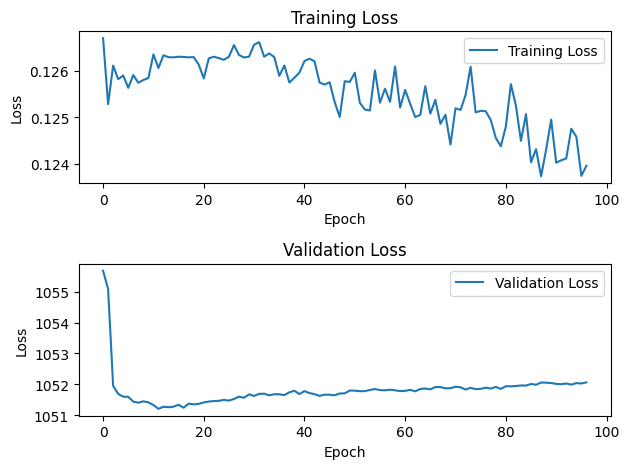

Epoch 97/250, Loss: 0.12395086884498596
Epoch 97/250, Validation Loss: 1052.0689697265625


KeyboardInterrupt: 

In [96]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

train_losses = []
val_losses = []

num_epochs = 250
batch_size = 42
patience = 100  # Define a quantidade de épocas para esperar antes de interromper

model_lstm = LSTM_drafter()
optimizer = torch.optim.Adam(model_lstm.parameters(), lr=0.001)
loss_function = nn.CrossEntropyLoss()

best_val_loss = float('inf')
count_without_improvement = 0

for epoch in range(num_epochs):
    for inputs_batch, labels_batch in create_batches(x_train, y_train, batch_size):
        hidden = model_lstm.init_hidden(inputs_batch.shape[0])

        optimizer.zero_grad()
        loss = 0.0

        inputs = torch.tensor(inputs_batch, dtype=torch.float32).unsqueeze(1)
        labels = torch.tensor(labels_batch, dtype=torch.long)

        output, hidden = model_lstm(inputs, hidden)
        loss += loss_function(output, labels)

        loss = loss / inputs_batch.shape[0]
        loss.backward()
        optimizer.step()

    train_losses.append(loss.item())
    val_losses.append(val_loss.item())

    # Atualiza os gráficos após cada época
    clear_output(wait=True)
    fig, axs = plt.subplots(2)

    # Gráfico de perda de treinamento
    axs[0].plot(train_losses, label='Training Loss')
    axs[0].set_title('Training Loss')
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Loss')
    axs[0].legend()

    # Gráfico de perda de validação
    axs[1].plot(val_losses, label='Validation Loss')
    axs[1].set_title('Validation Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Loss')
    axs[1].legend()

    plt.tight_layout()
    plt.show()

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')

    # Calcula a perda de validação aqui
    val_loss = 0
    for inputs_batch, labels_batch in create_batches(x_val, y_val, batch_size):
        hidden = model_lstm.init_hidden(inputs_batch.shape[0])
        inputs = torch.tensor(inputs_batch, dtype=torch.float32).unsqueeze(1)
        labels = torch.tensor(labels_batch, dtype=torch.long)

        with torch.no_grad():
            output, hidden = model_lstm(inputs, hidden)
            val_loss += loss_function(output, labels)
    val_loss = val_loss / inputs_batch.shape[0]

    print(f'Epoch {epoch+1}/{num_epochs}, Validation Loss: {val_loss.item()}')

    # Early stopping e salva o melhor modelo
    if val_loss.item() < best_val_loss:
        best_val_loss = val_loss.item()
        count_without_improvement = 0
        # Salva o melhor modelo
        torch.save(model_lstm.state_dict(), 'best_model_lstm.pt')
    else:
        count_without_improvement += 1
        if count_without_improvement >= patience:
            print('Early stopping')
            break

# Carrega o melhor modelo após o treinamento
model_lstm.load_state_dict(torch.load('best_model_lstm.pt'))

In [ ]:
#test
x_test = test_set.loc[:, test_set.columns.str.startswith('pack')]
x_test = x_test.drop(['pack_number'], axis=1)


In [ ]:
out_hot_enc = x_test.columns.to_list()


In [ ]:
y_test = []
for pick in test_set['pick'].to_list():
    y_test.append(out_hot_enc.index('pack_card_'+pick))


In [ ]:
input_data = torch.tensor(x_test.values, dtype=torch.float32)
input_data = input_data.unsqueeze(1)
label_data = torch.tensor(y_test, dtype=torch.float32)


In [ ]:
hidden = model_lstm.init_hidden(input_data.shape[0])
output, hidden = model_lstm(input_data, hidden)


In [ ]:
_, predicted = torch.max(output.data, 1)


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(label_data, predicted)


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(label_data, predicted)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(label_data, predicted))


In [ ]:
#save model
torch.save(model_lstm.state_dict(), 'model/model_lstm.pt')


In [ ]:
#load model